## Exploratory Data Analysis on Twitter Dataset

###  Importing the required modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset with suitable encoding

In [2]:
df=pd.read_csv("Information.csv",encoding='ISO-8859-1')

In [3]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


### Dropping the columns which are of less significance as a part of feature engineering.

In [4]:
col=["profile_yn_gold", "gender_gold", "tweet_location","user_timezone","tweet_coord",  "_last_judgment_at"]
df.drop(col,axis=1,inplace=True)

### Dataset after dropping 6 columns

In [5]:
df


,_unit_id,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,False,finalized,3,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,False,finalized,3,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,False,finalized,3,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17
4,815719230,False,finalized,3,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,female,1.0000,yes,1.0,8/5/15 21:16,(rp),302,0084B4,capuletrosa,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20,6.587400e+17
20046,815757681,True,golden,248,male,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40,6.587300e+17
20047,815757830,True,golden,264,male,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,26419,10/26/15 13:20,6.587400e+17
20048,815757921,True,golden,250,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,argumatronic,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,56073,10/26/15 12:40,6.587300e+17


### Dropping duplicate values

In [6]:
df.drop_duplicates(inplace=True)

### Checking for null values across the columns

In [7]:
df.isnull().sum()

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
gender                     97
gender:confidence          26
profile_yn                  0
profile_yn:confidence       0
created                     0
description              3744
fav_number                  0
link_color                  0
name                        0
profileimage                0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
tweet_id                    0
dtype: int64

### Dropping null values in gender and gender:confidence columns as they are of no significance with gender being the dependant variable

In [8]:
c=["gender","gender:confidence"]
df.dropna(subset=c,how="any",inplace=True)

In [9]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,False,finalized,3,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,False,finalized,3,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,False,finalized,3,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17
4,815719230,False,finalized,3,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,female,1.0000,yes,1.0,8/5/15 21:16,(rp),302,0084B4,capuletrosa,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20,6.587400e+17
20046,815757681,True,golden,248,male,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40,6.587300e+17
20047,815757830,True,golden,264,male,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,26419,10/26/15 13:20,6.587400e+17
20048,815757921,True,golden,250,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,argumatronic,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,56073,10/26/15 12:40,6.587300e+17


### Checking null values further

In [10]:
df.isnull().sum()

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
gender                      0
gender:confidence           0
profile_yn                  0
profile_yn:confidence       0
created                     0
description              3729
fav_number                  0
link_color                  0
name                        0
profileimage                0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
tweet_id                    0
dtype: int64

### Replacing null values in text column with empty string

In [11]:
df["text"].fillna("", inplace=True)

### Replacing null values in description column with empty string

In [12]:
df["description"].fillna("",inplace=True)

### Removing the special characters and hyperlinks in text column using regular Expressions

In [13]:
o=list(df["text"])
import re

l=[]
k=[]
for s in df["text"] :
    a=re.sub(r"http://t.co/[a-zA-Z0-9]*"," ",str(s))
    b=re.sub(r"https://t.co/[a-zA-Z0-9]*"," ",str(s))
    
    l.append(a)
    k.append(b)
    
df.replace(inplace=True, to_replace=o, value=l)
o=list(df["text"])
df.replace(inplace=True, to_replace=o, value=k)
    
df["text"].replace(regex=True, inplace=True, to_replace=r'[,!.; -@!%^&*)(]', value=' ')

In [14]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,False,finalized,3,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,False,finalized,3,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,False,finalized,3,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi JordanSpieth Looking at the url do you...,1693,10/26/15 12:40,6.587300e+17
4,815719230,False,finalized,3,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky catching up with t...,31462,10/26/15 12:40,6.587300e+17


In [15]:
df.shape


(19953, 20)

In [16]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,1.995300e+04,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,1.995300e+04,1.995300e+04
mean,8.157295e+08,3.618704,0.885897,0.994374,4373.970882,0.079186,3.892440e+04,6.587350e+17
std,5.999876e+03,12.361756,0.184344,0.043067,12364.729694,2.655045,1.169175e+05,5.000125e+12
min,8.157192e+08,3.000000,0.314000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.678300,1.000000,10.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.147600e+04,6.587400e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3319.000000,0.000000,4.005400e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               19953 non-null  int64  
 1   _golden                19953 non-null  bool   
 2   _unit_state            19953 non-null  object 
 3   _trusted_judgments     19953 non-null  int64  
 4   gender                 19953 non-null  object 
 5   gender:confidence      19953 non-null  float64
 6   profile_yn             19953 non-null  object 
 7   profile_yn:confidence  19953 non-null  float64
 8   created                19953 non-null  object 
 9   description            19953 non-null  object 
 10  fav_number             19953 non-null  int64  
 11  link_color             19953 non-null  object 
 12  name                   19953 non-null  object 
 13  profileimage           19953 non-null  object 
 14  retweet_count          19953 non-null  int64  
 15  si

In [18]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', 'gender',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created',
       'description', 'fav_number', 'link_color', 'name', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_count',
       'tweet_created', 'tweet_id'],
      dtype='object')

### Converting Categorical data to Numerical data

In [19]:
num_col=df.select_dtypes(include=np.number).columns
print("Numerical Columns :\n",num_col)
cat_col=df.select_dtypes(exclude=np.number).columns
print("Categorical Columns :\n",cat_col)

Numerical Columns :
 Index(['_unit_id', '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count',
       'tweet_id'],
      dtype='object')
Categorical Columns :
 Index(['_golden', '_unit_state', 'gender', 'profile_yn', 'created',
       'description', 'link_color', 'name', 'profileimage', 'sidebar_color',
       'text', 'tweet_created'],
      dtype='object')


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['_golden']=le.fit_transform(df['_golden'])
df['_unit_state']=le.fit_transform(df['_unit_state'])
df['sidebar_color'] = le.fit_transform(df['sidebar_color'])
df['link_color'] = le.fit_transform(df['link_color'])
df['created'] = le.fit_transform(df['created'])
df['profileimage'] = le.fit_transform(df['profileimage'])
df['tweet_created'] = le.fit_transform(df['tweet_created'])
df['name'] = le.fit_transform(df['name'])

In [21]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,0,0,3,male,1.0000,yes,1.0,4961,i sing my own rhythm.,0,248,17087,2170,0,558,Robbie E Responds To Critics After Win Against...,110964,1,6.587300e+17
1,815719227,0,0,3,male,1.0000,yes,1.0,1343,I'm the author of novels filled with family dr...,68,77,3220,4084,0,365,ÛÏIt felt like they were my friends and I was...,7471,1,6.587300e+17
2,815719228,0,0,3,male,0.6625,yes,1.0,3686,louis whining and squealing and all,7696,2002,15202,14532,1,365,i absolutely adore when louis starts the songs...,5617,1,6.587300e+17
3,815719229,0,0,3,male,1.0000,yes,1.0,11855,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,77,12686,910,0,365,Hi JordanSpieth Looking at the url do you...,1693,1,6.587300e+17
4,815719230,0,0,3,female,1.0000,yes,1.0,8891,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,1014,10189,4687,0,0,Watching Neighbours on Sky catching up with t...,31462,1,6.587300e+17


In [22]:
df.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
20045,815757572,1,1,259,female,1.0000,yes,1.0,16736,(rp),302,77,11860,13986,0,365,lookupondeath Fine and I ll drink tea too...,783,4,6.587400e+17
20046,815757681,1,1,248,male,1.0000,yes,1.0,15533,"Whatever you like, it's not a problem at all. ...",2513,2318,2046,8675,0,0,Greg Hardy you a good player and all but don t...,13523,1,6.587300e+17
20047,815757830,1,1,264,male,1.0000,yes,1.0,18216,#TeamBarcelona ..You look lost so you should f...,50,77,16659,12983,0,365,You can miss people and still never want to se...,26419,4,6.587400e+17
20048,815757921,1,1,250,female,0.8489,yes,1.0,3899,Anti-statist; I homeschool my kids. Aspiring t...,70804,1793,11201,14926,0,0,bitemyapp i had noticed your tendency to pee ...,56073,1,6.587300e+17
20049,815757985,1,1,249,female,1.0000,yes,1.0,8732,Teamwork makes the dream work.,3348,77,6641,12775,0,365,I think for my APUSH creative project I m goin...,2922,3,6.587400e+17


## Data Visualization

### Bar plot against gender and tweet count

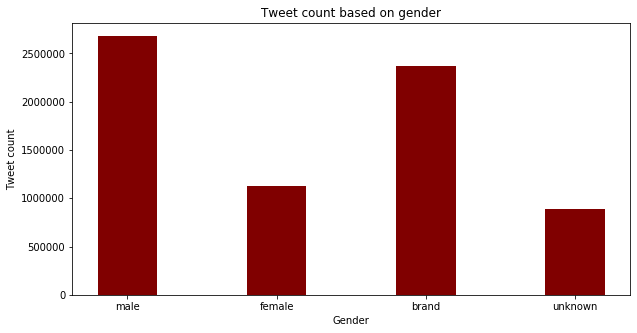

In [23]:
fig=plt.figure(figsize=(10,5))
plt.bar(df.gender,df.tweet_count,color='maroon',width=0.4)
plt.xlabel("Gender")
plt.ylabel("Tweet count")
plt.title("Tweet count based on gender")
plt.show()

###  Seaborn heatmap for a correlation matrix

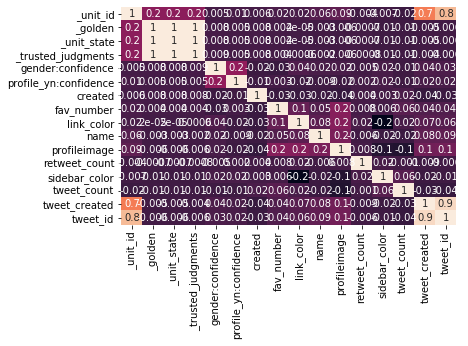

In [24]:
sns.heatmap(df.corr(),annot=True,fmt='.1g',cbar=False)

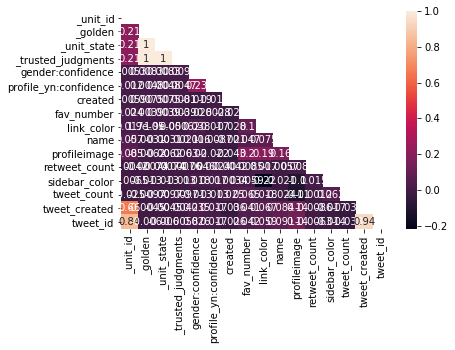

In [25]:
matrix=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=matrix)

# 1) Which gender has more gender confidence?

In [26]:
df.rename(columns = {'gender:confidence':'gender_confidence'}, inplace = True)

In [27]:
max_con = df.groupby('gender').agg(['mean']).gender_confidence

In [28]:
max_con

,mean
gender,
brand,0.868107
female,0.926360
male,0.905113
unknown,0.631267


In [29]:
max_con.rename(columns = {'mean':'mean_con'},inplace = True)

In [30]:
t = max_con[max_con.mean_con==max_con.mean_con.max()]

In [31]:
t

,mean_con
gender,
female,0.92636


# 2) Which gender has more average tweet count?

In [32]:
avg_tweet = df.groupby('gender').agg(['mean']).tweet_count

In [33]:
avg_tweet

,mean
gender,
brand,60146.667452
female,27286.799104
male,31796.416855
unknown,35361.219338


In [34]:
avg_tweet.rename(columns = {'mean':'max_tweet'},inplace = True)

In [35]:
t = avg_tweet[avg_tweet.max_tweet==avg_tweet.max_tweet.max()]
t

,max_tweet
gender,
brand,60146.667452


## RANDOM FOREST

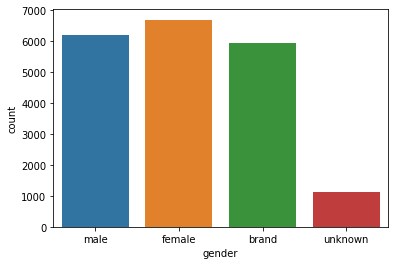

In [36]:
#seeing whether the data is balanced
sns.countplot(x="gender", data=df)

In [37]:
# data in gender has 4 values 
# delete the rows containing 'unknown' and 'brand'

df.drop(df[df['gender'] == 'unknown'].index, inplace = True)
df.drop(df[df['gender'] == 'brand'].index, inplace = True)
df.shape

(12894, 20)

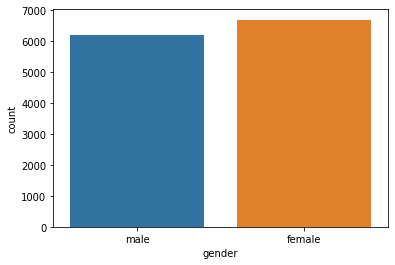

In [38]:
sns.countplot(x="gender", data=df)

In [39]:
# data is now almost balanced 

df.corr()

,_unit_id,_golden,_unit_state,_trusted_judgments,gender_confidence,profile_yn:confidence,created,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,tweet_count,tweet_created,tweet_id
_unit_id,1.000000,0.211767,0.211767,0.211498,-0.008990,0.011794,0.012221,0.007690,-0.006507,0.011184,0.036051,0.008928,0.000152,0.000742,0.667191,0.852530
_golden,0.211767,1.000000,1.000000,0.998888,0.009892,0.005226,0.006399,0.007424,-0.004565,-0.004704,-0.010548,-0.001362,-0.012301,-0.012733,-0.002177,-0.004746
_unit_state,0.211767,1.000000,1.000000,0.998888,0.009892,0.005226,0.006399,0.007424,-0.004565,-0.004704,-0.010548,-0.001362,-0.012301,-0.012733,-0.002177,-0.004746
_trusted_judgments,0.211498,0.998888,0.998888,1.000000,0.010046,0.005227,0.006849,0.007457,-0.003799,-0.004011,-0.010516,-0.001401,-0.011945,-0.012737,-0.001903,-0.004616
gender_confidence,-0.008990,0.009892,0.009892,0.010046,1.000000,0.249639,0.008811,-0.039906,-0.006548,-0.009085,-0.012348,0.000851,0.017526,-0.058310,-0.006143,-0.009582
profile_yn:confidence,0.011794,0.005226,0.005226,0.005227,0.249639,1.000000,-0.003159,0.003618,-0.024567,-0.009069,-0.032815,0.003436,0.014705,-0.036208,0.009905,0.011482
created,0.012221,0.006399,0.006399,0.006849,0.008811,-0.003159,1.000000,-0.016696,0.002480,0.016699,0.011590,-0.014633,-0.002075,-0.025865,-0.009303,-0.000384
fav_number,0.007690,0.007424,0.007424,0.007457,-0.039906,0.003618,-0.016696,1.000000,0.097219,0.020013,0.165334,0.020116,0.002164,0.175254,0.011549,0.009274
link_color,-0.006507,-0.004565,-0.004565,-0.003799,-0.006548,-0.024567,0.002480,0.097219,1.000000,0.020517,0.119114,0.011825,-0.203436,0.053359,0.008346,0.005183
name,0.011184,-0.004704,-0.004704,-0.004011,-0.009085,-0.009069,0.016699,0.020013,0.020517,1.000000,0.053184,-0.006764,0.005985,-0.001563,0.010429,0.013316


In [40]:
# Finding the accuracy of the model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


X = df[['_unit_id', '_golden', '_unit_state', '_trusted_judgments', 'gender_confidence', 'created', 'fav_number', 'name', 'profileimage', 'tweet_created', 'tweet_id', 'sidebar_color', 'link_color', 'profile_yn:confidence', 'retweet_count', 'tweet_count']]
Y = df[['gender']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=5)

rfc = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
rfc.fit(X_train, Y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, y_pred)
score

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6314293098991988

### Increasing the accuracy through Hyperparameters

In [41]:
rfclassifier = RandomForestClassifier()

param_grid= { 'max_depth' : [10,20,40],
             'n_estimators' : [100,200,300]
            }

grid = GridSearchCV(rfclassifier, param_grid, refit = True,verbose = 3)

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=100, score=0.638, total=   2.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=100, score=0.635, total=   2.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=100, score=0.645, total=   2.1s
[CV] max_depth=10, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=100, score=0.649, total=   2.2s
[CV] max_depth=10, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=100, score=0.632, total=   2.2s
[CV] max_depth=10, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=200, score=0.641, total=   4.3s
[CV] max_depth=10, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=200, score=0.631, total=   4.1s
[CV] max_depth=10, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=200, score=0.642, total=   4.2s
[CV] max_depth=10, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=200, score=0.653, total=   4.3s
[CV] max_depth=10, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=200, score=0.636, total=   4.3s
[CV] max_depth=10, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=300, score=0.644, total=   6.6s
[CV] max_depth=10, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=300, score=0.632, total=   6.6s
[CV] max_depth=10, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=300, score=0.645, total=   6.6s
[CV] max_depth=10, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=300, score=0.647, total=   6.4s
[CV] max_depth=10, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=10, n_estimators=300, score=0.621, total=   6.4s
[CV] max_depth=20, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=100, score=0.641, total=   2.9s
[CV] max_depth=20, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=100, score=0.638, total=   2.9s
[CV] max_depth=20, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=100, score=0.654, total=   3.0s
[CV] max_depth=20, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=100, score=0.647, total=   2.9s
[CV] max_depth=20, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=100, score=0.628, total=   2.9s
[CV] max_depth=20, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=200, score=0.652, total=   5.9s
[CV] max_depth=20, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=200, score=0.641, total=   5.9s
[CV] max_depth=20, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=200, score=0.645, total=   5.9s
[CV] max_depth=20, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=200, score=0.651, total=   5.9s
[CV] max_depth=20, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=200, score=0.623, total=   5.9s
[CV] max_depth=20, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=300, score=0.634, total=   8.8s
[CV] max_depth=20, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=300, score=0.648, total=   8.8s
[CV] max_depth=20, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=300, score=0.648, total=   8.8s
[CV] max_depth=20, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=300, score=0.653, total=   8.8s
[CV] max_depth=20, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=20, n_estimators=300, score=0.632, total=   8.8s
[CV] max_depth=40, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=100, score=0.636, total=   3.0s
[CV] max_depth=40, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=100, score=0.639, total=   2.9s
[CV] max_depth=40, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=100, score=0.657, total=   3.1s
[CV] max_depth=40, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=100, score=0.645, total=   3.0s
[CV] max_depth=40, n_estimators=100 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=100, score=0.625, total=   3.0s
[CV] max_depth=40, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=200, score=0.634, total=   6.0s
[CV] max_depth=40, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=200, score=0.639, total=   6.0s
[CV] max_depth=40, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=200, score=0.646, total=   6.0s
[CV] max_depth=40, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=200, score=0.653, total=   6.0s
[CV] max_depth=40, n_estimators=200 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=200, score=0.621, total=   6.0s
[CV] max_depth=40, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=300, score=0.643, total=   9.0s
[CV] max_depth=40, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=300, score=0.642, total=   9.0s
[CV] max_depth=40, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=300, score=0.653, total=   9.0s
[CV] max_depth=40, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=300, score=0.654, total=   9.0s
[CV] max_depth=40, n_estimators=300 ..................................


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...... max_depth=40, n_estimators=300, score=0.625, total=   9.0s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.1min finished
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [42]:
print(grid.best_params_)

print(grid.best_estimator_)

{'max_depth': 40, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [43]:
grid_predictions = grid.predict(X_test)

print("Accuray is \n", accuracy_score(Y_test, grid_predictions))

Accuray is 
 0.6577927112949082


### The Accuracy of Random Forest Model is 65 %



# SVM :

In [44]:
# finding the accuracy of the SVM model

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

ip= df[[ 'gender_confidence', 'created',  'profileimage', 'tweet_id', 'sidebar_color', 'link_color', 'retweet_count', 'tweet_count']]
op= df[['gender']]

ip_train, ip_test, op_train, op_test = train_test_split(ip,op, test_size = 0.2, random_state=100)

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=100,dual=False, tol=1e-5,penalty='l2',intercept_scaling=43.9))
clf.fit(ip_train, op_train.values.ravel())

actual = clf.predict(ip_test)

score = accuracy_score(op_test,actual)
score

0.6316401706087631

In [45]:
from sklearn.metrics import classification_report

print(classification_report(op_test, actual))

              precision    recall  f1-score   support

      female       0.64      0.69      0.67      1368
        male       0.62      0.56      0.59      1211

    accuracy                           0.63      2579
   macro avg       0.63      0.63      0.63      2579
weighted avg       0.63      0.63      0.63      2579



## SVM model accuracy is 63.16%.



# NAIVE BAYES :

In [46]:
import re
import string

In [47]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
data=pd.DataFrame()
data['tweets'] = [cleaning(s) for s in df['description']]
data['gender']=df['gender']

In [48]:
data

,tweets,gender
0,i sing my own rhythm,male
1,i m the author of novels filled with family dr...,male
2,louis whining and squealing and all,male
3,mobile guy ers shazam google kleiner perkins y...,male
4,ricky wilson the best frontman kaiser chiefs t...,female
...,...,...
12889,rp,NaN
12890,whatever you like it s not a problem at all ch...,female
12891,teambarcelona you look lost so you should fol...,female
12892,anti statist i homeschool my kids aspiring tho...,male


In [49]:
import nltk

from nltk.tokenize import word_tokenize

In [50]:
for i in range(20):
    print(df['text'].values[i],df['gender'].values[i])

Robbie E Responds To Critics After Win Against Eddie Edwards In The  WorldTitleSeries   male
ÛÏIt felt like they were my friends and I was living the story with themÛ    retired  IAN    male
i absolutely adore when louis starts the songs it hits me hard but it feels good male
Hi  JordanSpieth   Looking at the url   do you use  IFTTT    Don t typically see an advanced user on the  PGATOUR    male
Watching Neighbours on Sky  catching up with the Neighbs   Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx female
Ive seen people on the train with lamps  chairs  tvs etc    female
Gala Bingo clubs bought for å£   m  The UK s largest High Street bingo operator  Gala  is being taken over byÛ_   male
 _Aphmau_ the pic defines all mcd fangirls fanboys and mcd shippers xD female
 Evielady just how lovely is the tree this year  Never seen it as gorgeous as this  Autumn  colour female
Just put my ass on the line for you and this is how you repay me  female
will i even need sound effects for the diviners ton

## Removing stopwords from text

In [51]:
from nltk.corpus import stopwords
stop_words = stopwords.words('English')

In [52]:
clean_texts = []
for i in range(df.shape[0]):
    current_message = df['text'].values[i]
    tokenized_words = word_tokenize(current_message)
    clean_message = ''
    for word in tokenized_words:
        if word not in stop_words:
            try:
                word = int(word)
            except:
                clean_message += word + ' '
                
    clean_texts.append(clean_message)        
    
len(clean_texts)

12894

In [53]:
clean_texts

['Robbie E Responds To Critics After Win Against Eddie Edwards In The WorldTitleSeries ',
 '\x89ÛÏIt felt like friends I living story them\x89Û\x9d retired IAN ',
 'absolutely adore louis starts songs hits hard feels good ',
 'Hi JordanSpieth Looking url use IFTTT Don typically see advanced user PGATOUR ',
 'Watching Neighbours Sky catching Neighbs Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù\x8fÈ_ÙÔ\x8d_Ù\x8fÈ Xxx ',
 'Ive seen people train lamps chairs tvs etc ',
 'Gala Bingo clubs bought å£ The UK largest High Street bingo operator Gala taken by\x89Û_ ',
 '_Aphmau_ pic defines mcd fangirls fanboys mcd shippers xD ',
 'Evielady lovely tree year Never seen gorgeous Autumn colour ',
 'Just put ass line repay ',
 'even need sound effects diviners tonight ',
 'It glow satisfaction The Glow ',
 'giannaaa lmao _Ù÷â_Ù÷â dude I hella scared next episode bc ending yesterday ',
 'coolyazzy Ditto I still learning favourites retweet stuff least sucks less Facebook haha P ',
 'CaribBros JstSaleem I I understand get se

In [54]:
df['clean_text'] = clean_texts
df

,_unit_id,_golden,_unit_state,_trusted_judgments,gender,gender_confidence,profile_yn,profile_yn:confidence,created,description,...,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,clean_text
0,815719226,0,0,3,male,1.0000,yes,1.0,4961,i sing my own rhythm.,...,248,17087,2170,0,558,Robbie E Responds To Critics After Win Against...,110964,1,6.587300e+17,Robbie E Responds To Critics After Win Against...
1,815719227,0,0,3,male,1.0000,yes,1.0,1343,I'm the author of novels filled with family dr...,...,77,3220,4084,0,365,ÛÏIt felt like they were my friends and I was...,7471,1,6.587300e+17,ÛÏIt felt like friends I living story themÛ...
2,815719228,0,0,3,male,0.6625,yes,1.0,3686,louis whining and squealing and all,...,2002,15202,14532,1,365,i absolutely adore when louis starts the songs...,5617,1,6.587300e+17,absolutely adore louis starts songs hits hard ...
3,815719229,0,0,3,male,1.0000,yes,1.0,11855,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,77,12686,910,0,365,Hi JordanSpieth Looking at the url do you...,1693,1,6.587300e+17,Hi JordanSpieth Looking url use IFTTT Don typi...
4,815719230,0,0,3,female,1.0000,yes,1.0,8891,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,1014,10189,4687,0,0,Watching Neighbours on Sky catching up with t...,31462,1,6.587300e+17,Watching Neighbours Sky catching Neighbs Xxx _...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,1,1,259,female,1.0000,yes,1.0,16736,(rp),...,77,11860,13986,0,365,lookupondeath Fine and I ll drink tea too...,783,4,6.587400e+17,lookupondeath Fine I drink tea I love
20046,815757681,1,1,248,male,1.0000,yes,1.0,15533,"Whatever you like, it's not a problem at all. ...",...,2318,2046,8675,0,0,Greg Hardy you a good player and all but don t...,13523,1,6.587300e+17,Greg Hardy good player get face Dez Bryant Lea...
20047,815757830,1,1,264,male,1.0000,yes,1.0,18216,#TeamBarcelona ..You look lost so you should f...,...,77,16659,12983,0,365,You can miss people and still never want to se...,26419,4,6.587400e+17,You miss people still never want see
20048,815757921,1,1,250,female,0.8489,yes,1.0,3899,Anti-statist; I homeschool my kids. Aspiring t...,...,1793,11201,14926,0,0,bitemyapp i had noticed your tendency to pee ...,56073,1,6.587300e+17,bitemyapp noticed tendency pee carpet want say...


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
sparse_data = cv.fit_transform(df['clean_text'])

In [56]:
cv.get_feature_names()

['__',
 '___',
 '____',
 '_____',
 '___augustina',
 '___dawnyiel',
 '___â',
 '__dope__kid',
 '__glennjamin',
 '__jquinzel__',
 '__lilnate',
 '__mccann__',
 '__mozes',
 '__sammanthae',
 '__tiyraaa',
 '__uncleelroy',
 '__ù',
 '__ù_',
 '__ù_µ',
 '__ù_ä',
 '__ù_ä_ùôé_ùõ',
 '__ù_õ',
 '__ùª',
 '__ùªä',
 '__ùªî_ù',
 '__ùªö',
 '__ùªö_ù',
 '__ùªü_ù',
 '__ùî',
 '__ùî_',
 '__ùî__ù',
 '__ùð',
 '__ùò¼',
 '__ùó',
 '__ùó__ùó',
 '__ùóç',
 '__ùô',
 '__ùô__ù',
 '__ùôã',
 '__ùôî_ù',
 '__ùôî_ùó',
 '__ùôô',
 '__ùõ',
 '__ùõ_',
 '__ùõä_ù',
 '__ùõé_ù',
 '__ùõï',
 '__ùõñ',
 '__ùõø',
 '__ùõû',
 '_a_name',
 '_akanshagautam',
 '_alex',
 '_angusbaker',
 '_aphmau_',
 '_arleneaguero',
 '_awkwardasia',
 '_bedderz',
 '_benzee',
 '_blownemind',
 '_bonga',
 '_brittbass',
 '_bvm',
 '_callhersherry',
 '_camoore',
 '_cantlow',
 '_connorm',
 '_courtkneelove',
 '_danibatze',
 '_david_edward',
 '_degrees',
 '_delaneykeys',
 '_ditsie_',
 '_e',
 '_easymusic',
 '_evelynsanz',
 '_gags_',
 '_goneaway_',
 '_gracie',
 '_granger',
 '

In [57]:
# Finding the accuracy of Naive Bayes model

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(sparse_data, df['gender'])

In [58]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.6166253101736973

## Accuracy of Naive Bayes model is 61 %

# Hence, the best classification algorithm as per accuracy is Random Forest.